# **Street View Housing Number Digit Recognition**

--------------
## **Context** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
## **Objective**
----------------

To build a neural network model that can recognize the digits in the images. 

-------------
## **Dataset**
-------------
It's a subset of the original data to save some computation time. The dataset is in .h5 file.

## **Mount the drive**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

## **Loading the dataset**

In [ ]:
import h5py

# Opening the file

h5f = h5py.File('/content/drive/MyDrive/Colab Notebooks/SVHN Digit Recognition/SVHN_single_grey1.h5', 'r')

# Loading the training and the test datasets

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Closing the file

h5f.close()

Let's check the number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
- There are 42,000 images in the training data and 18,000 images in the testing data. 

## **Visualizing images**

- Let's use X_train to visualize the first 10 images.
- Let's use Y_train to print the first 10 labels.

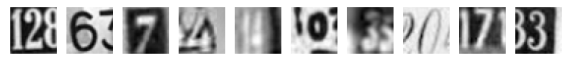

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# Visualizing the first 10 images in the dataset and printing their labels

plt.figure(figsize = (10, 1))

for i in range(10):

    plt.subplot(1, 10, i+1)

    plt.imshow(X_train[i], cmap = "gray")

    plt.axis('off')

plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

In [ ]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# Reshaping the dataset to flatten images
X_train = X_train.reshape(X_train.shape[0], 1024)

X_test = X_test.reshape(X_test.shape[0], 1024)

In [ ]:
# Normalizing inputs from 0-255 to 0-1

X_train = X_train/255

X_test = X_test/255

In [ ]:
# Let's check the new shape 

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


In [ ]:
# Let's one-hot encode the output

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# Test labels

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

In [ ]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
# Let's build the first model

def nn_model_1():

    model = Sequential() 
    
    model.add(Dense(64, input_shape=(1024,),activation='relu'))

    model.add(Dense(32,activation='relu'))

    model.add(Dense(10,activation='softmax'))
      
    # Compilation of the model

    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [ ]:
model_1 = nn_model_1()

In [ ]:
# Let's see the model summary

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Let's train the model

history_model_1 = model_1.fit(X_train,y_train,validation_split=0.2,verbose=1,epochs=20,batch_size=128)

Epoch 1/20
263/263 [==============================] - 4s 11ms/step - loss: 2.2993 - accuracy: 0.1179 - val_loss: 2.2594 - val_accuracy: 0.1463
Epoch 2/20
263/263 [==============================] - 2s 8ms/step - loss: 2.1130 - accuracy: 0.2276 - val_loss: 1.9376 - val_accuracy: 0.3279
Epoch 3/20
263/263 [==============================] - 1s 5ms/step - loss: 1.7953 - accuracy: 0.3824 - val_loss: 1.6499 - val_accuracy: 0.4551
Epoch 4/20
263/263 [==============================] - 1s 6ms/step - loss: 1.5726 - accuracy: 0.4828 - val_loss: 1.4957 - val_accuracy: 0.5094
Epoch 5/20
263/263 [==============================] - 1s 4ms/step - loss: 1.4604 - accuracy: 0.5268 - val_loss: 1.4267 - val_accuracy: 0.5357
Epoch 6/20
263/263 [==============================] - 1s 4ms/step - loss: 1.4008 - accuracy: 0.5503 - val_loss: 1.3652 - val_accuracy: 0.5613
Epoch 7/20
263/263 [==============================] - 1s 4ms/step - loss: 1.3588 - accuracy: 0.5682 - val_loss: 1.3282 - val_accuracy: 0.5799
Epoch

### **Model evaluation**

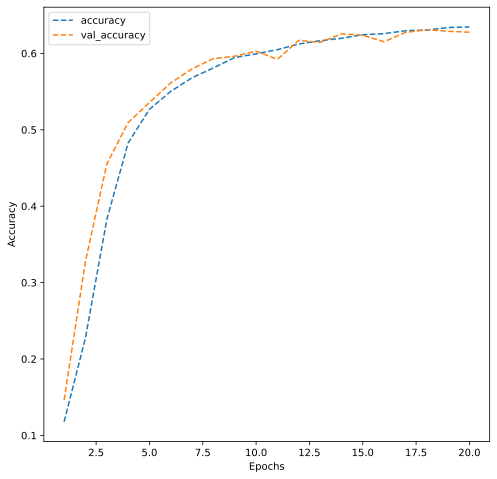

In [ ]:
# Plotting the accuracies

dict_hist = history_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:**

- Accuracy is quite low, the model identifies numbers correctly only in ~63% of the cases. 
- At the same time we can see that model is not overfitting, and the accuracy seems to continue to grow. Probably if we run the model for more epochs or increase it's complexity we can improve the accuracy. 

### **Let's build one more model with higher complexity and see if we can improve the performance of the model.** 

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [ ]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
# Defining the model

def nn_model_2():

    model = Sequential()  
    
    
    model.add(Dense(256,input_shape=(1024,),activation='relu'))

    model.add(Dense(128,activation='relu'))

    model.add(Dropout(0.2))

    model.add(Dense(64,activation='relu'))

    model.add(Dense(64,activation='relu'))

    model.add(Dense(32,activation='relu'))

    model.add(BatchNormalization())

    model.add(Dense(10,activation='softmax'))
    
    # Compiling the model

    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [ ]:
model_2 = nn_model_2()

In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               1

In [ ]:
# Let's train the model

history_model_2 = model_2.fit(X_train,y_train,validation_split=0.2,verbose=1, epochs=30, batch_size=128)

Epoch 1/30
263/263 [==============================] - 4s 11ms/step - loss: 2.3346 - accuracy: 0.1002 - val_loss: 2.3139 - val_accuracy: 0.0985
Epoch 2/30
263/263 [==============================] - 3s 10ms/step - loss: 2.3023 - accuracy: 0.1072 - val_loss: 2.2944 - val_accuracy: 0.1225
Epoch 3/30
263/263 [==============================] - 3s 10ms/step - loss: 2.0815 - accuracy: 0.1963 - val_loss: 2.0802 - val_accuracy: 0.2286
Epoch 4/30
263/263 [==============================] - 3s 10ms/step - loss: 1.6827 - accuracy: 0.4115 - val_loss: 1.5690 - val_accuracy: 0.4737
Epoch 5/30
263/263 [==============================] - 3s 10ms/step - loss: 1.4126 - accuracy: 0.5264 - val_loss: 1.3555 - val_accuracy: 0.5450
Epoch 6/30
263/263 [==============================] - 3s 10ms/step - loss: 1.2738 - accuracy: 0.5780 - val_loss: 1.1789 - val_accuracy: 0.6145
Epoch 7/30
263/263 [==============================] - 3s 10ms/step - loss: 1.1798 - accuracy: 0.6143 - val_loss: 1.1785 - val_accuracy: 0.6108

### **Model Evaluation**

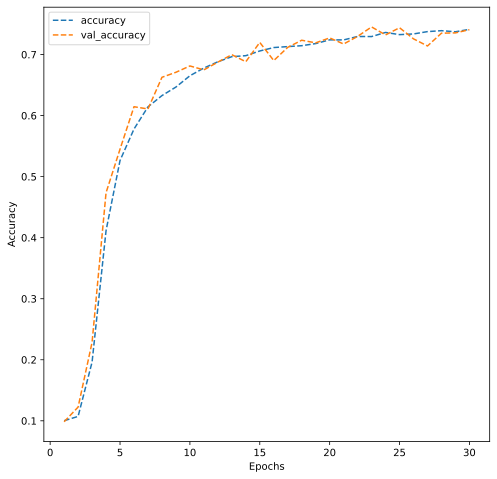

In [ ]:
# Plotting the accuracies

dict_hist = history_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:**

- The accuracy improved quite a bit (from ~ 63% to ~ 74%) and the model is still not overfitting. Which means that the more complex model works better.   
- Probably if we increase complexity of the model further or train it for more epochs we could achieve even better results.

## **Predictions on the test data**


In [ ]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

In [ ]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test, axis = -1)

## **Let's build classsification report and confusion matrix for the model 2**

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1814
           1       0.71      0.81      0.76      1828
           2       0.76      0.77      0.76      1803
           3       0.73      0.69      0.71      1719
           4       0.74      0.83      0.78      1812
           5       0.73      0.67      0.70      1768
           6       0.79      0.68      0.73      1832
           7       0.77      0.80      0.78      1808
           8       0.66      0.72      0.69      1812
           9       0.75      0.70      0.73      1804

    accuracy                           0.74     18000
   macro avg       0.74      0.74      0.74     18000
weighted avg       0.74      0.74      0.74     18000



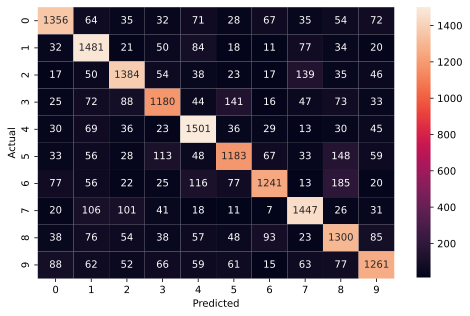

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test,test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test,test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

## **Observations:**

- The weighted accuracy, precision and recall are around 74% for the model. Which is moderate perfomance. Probably we should choose more complex architecture or try different type of NN. We will see if CNN can achieve better perfomance. 
- There are some digits which are harder to identify for the model. For example 3 and 5. The easiest digits to recognize for the model are 1,4 and 7. 

# **Convolutional Neural Networks**

## **Importing the necessary libraries**

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

## **Load the dataset**



In [ ]:
import h5py


h5f = h5py.File('/content/drive/MyDrive/Colab Notebooks/SVHN Digit Recognition/SVHN_single_grey1.h5', 'r')

# Loading the the train and the test dataset

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Closing the file

h5f.close()

Let's check the number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
- There are 42,000 images in the training data and 18,000 images in the testing data. 

## **Data preparation**

In [ ]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# Reshaping the dataset to be able to pass them to CNNs.

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)

X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

In [ ]:
# Normalizing inputs from 0-255 to 0-1

X_train = X_train / 255.0

X_test = X_test / 255.0

In [ ]:
# New shape 

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


In [ ]:
# Let's one-hot encode the output

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# test labels

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.

In [ ]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
# Defining the model

def cnn_model_1():

    model = Sequential() 

    model.add(Conv2D(filters=16, kernel_size=(3,3),padding='same',input_shape=(32,32,1)))

    model.add(LeakyReLU(0.1))

    model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same'))

    model.add(LeakyReLU(0.1))

    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Flatten())

    model.add(Dense(32))

    model.add(LeakyReLU(0.1))

    model.add(Dense(10,activation='softmax'))
    
    # Compiling the model

    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    return model

In [ ]:
model_1 = cnn_model_1()

In [ ]:
# Let's see the model summary

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                        

In [ ]:
# Training the model

history_model_1 = model_1.fit(X_train,y_train,validation_split=0.2, batch_size=32,verbose=1,epochs=20)

Epoch 1/20
1050/1050 [==============================] - 16s 4ms/step - loss: 1.1864 - accuracy: 0.6054 - val_loss: 0.6454 - val_accuracy: 0.8119
Epoch 2/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.5306 - accuracy: 0.8479 - val_loss: 0.5059 - val_accuracy: 0.8589
Epoch 3/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.4332 - accuracy: 0.8730 - val_loss: 0.5023 - val_accuracy: 0.8579
Epoch 4/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.3745 - accuracy: 0.8905 - val_loss: 0.4496 - val_accuracy: 0.8754
Epoch 5/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.3348 - accuracy: 0.8996 - val_loss: 0.4730 - val_accuracy: 0.8725
Epoch 6/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2930 - accuracy: 0.9136 - val_loss: 0.4640 - val_accuracy: 0.8745
Epoch 7/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2657 - accuracy: 0.9205 - val_loss: 0.4552 - val_accuracy

### **Model Evaluation**

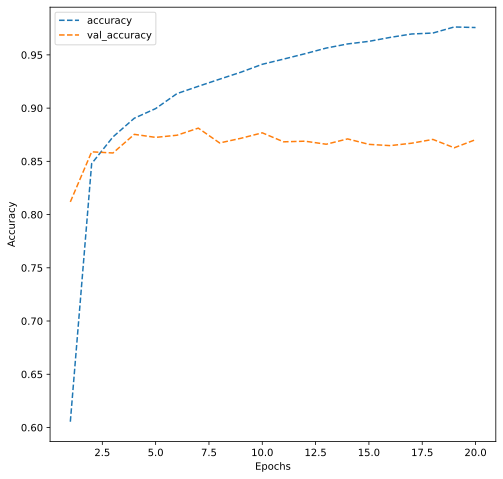

In [ ]:
# Plotting the accuracies

dict_hist = history_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:**
- The accuracy is improved significantly compared to the ANN model
- Unfortunately the model is overfitting, so we should either employ early stopping as regularization or try another architecture with regularization techniques.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [ ]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
# Defining the model

def cnn_model_2():
    
    model = Sequential()
    

    model.add(Conv2D(filters=16, kernel_size=(3,3),padding='same',input_shape=(32,32,1)))

    model.add(LeakyReLU(0.1))

    model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same'))

    model.add(LeakyReLU(0.1))

    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(BatchNormalization())

    model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same'))

    model.add(LeakyReLU(0.1))

    model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same'))

    model.add(LeakyReLU(0.1))

    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(BatchNormalization())

    model.add(Flatten())

    model.add(Dense(32))

    model.add(LeakyReLU(0.1))

    model.add(Dropout(0.5))

    model.add(Dense(10,activation='softmax'))

    # Compiling the model

    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    return model

In [ ]:
model_2 = cnn_model_2()

In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

In [ ]:
# Training the model

history_model_2 = model_2.fit(X_train,y_train,validation_split=0.2,batch_size=128,verbose=1,epochs=30)

Epoch 1/30
263/263 [==============================] - 4s 11ms/step - loss: 1.4744 - accuracy: 0.4974 - val_loss: 2.5106 - val_accuracy: 0.2676
Epoch 2/30
263/263 [==============================] - 2s 9ms/step - loss: 0.6931 - accuracy: 0.7856 - val_loss: 0.6855 - val_accuracy: 0.7930
Epoch 3/30
263/263 [==============================] - 2s 9ms/step - loss: 0.5577 - accuracy: 0.8293 - val_loss: 0.5618 - val_accuracy: 0.8452
Epoch 4/30
263/263 [==============================] - 2s 9ms/step - loss: 0.4994 - accuracy: 0.8469 - val_loss: 0.4165 - val_accuracy: 0.8775
Epoch 5/30
263/263 [==============================] - 2s 9ms/step - loss: 0.4509 - accuracy: 0.8641 - val_loss: 0.4307 - val_accuracy: 0.8850
Epoch 6/30
263/263 [==============================] - 2s 9ms/step - loss: 0.4117 - accuracy: 0.8738 - val_loss: 0.4016 - val_accuracy: 0.8855
Epoch 7/30
263/263 [==============================] - 2s 9ms/step - loss: 0.3820 - accuracy: 0.8841 - val_loss: 0.4401 - val_accuracy: 0.8742
Epoch

### **Model Evaluation**

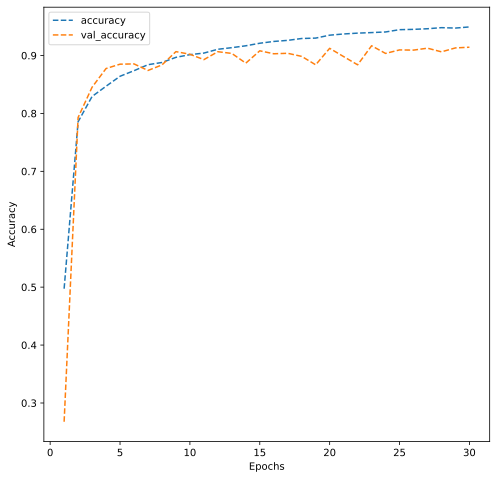

In [ ]:
# Plotting the accuracies

dict_hist = history_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:**
- With more complex model and regularization techniques we achieved drastic raise in perfomance of the model (~ 91% of validated accuracy vs ~ 87% of validated accuracy)
- Model is still slightly overfitting but this is within normal limits. 

## **Predictions on the test data**

In [ ]:
# Let's make predictions on the test data using model_2 

test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

In [ ]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test, axis = -1)

## **Let's build classsification report and confusion matrix for the Final model**

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1814
           1       0.90      0.93      0.91      1828
           2       0.94      0.91      0.92      1803
           3       0.92      0.87      0.90      1719
           4       0.93      0.93      0.93      1812
           5       0.91      0.91      0.91      1768
           6       0.89      0.90      0.90      1832
           7       0.92      0.94      0.93      1808
           8       0.91      0.88      0.90      1812
           9       0.89      0.91      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



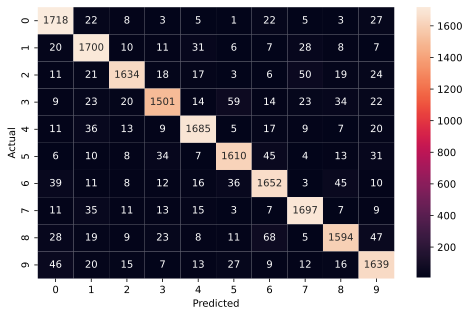

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:**

- We achieved drastic improvement in perfomance of the model compared to ANN with weighted precision, recall and F1 score of 91% vs 74% for ANN. That means that CNN architecture is preferable for our problem. 
- Performance of the model is quite close to the reference perfomance on the model of 97.84% achieved by Ian J. Goodfellow, Yaroslav Bulatov, Julian Ibarz, Sacha Arnoud and Vinay Shet. This is quite impressive taking into account that we have used only a subset of the SVHN dataset, so we could expect even better results by training on the full dataset. 
- The model still have more difficulties in identifying some numbers. For example number 3. 